# QUESTION ONE


In [27]:
import numpy as np

# Transition matrix for the given Markov chain
P = np.array([
    [0.98, 0.019, 0.001],  # From Healthy (H) to [H, S, D]
    [0.2, 0.75, 0.05],     # From Sick (S) to [H, S, D]
    [0.0, 0.0, 1.0]        # From Dead (D) to [H, S, D]
])

class MarkovChain:
    def __init__(self, transition_matrix):
        self.transition_matrix = transition_matrix

    def step(self, state, steps):
        return np.linalg.matrix_power(self.transition_matrix, steps).dot(state)

transitions_markov = MarkovChain(P)
print(f"transitions_markov: {transitions_markov}")

initial_state_healthy = np.array([1, 0, 0])

# ii) Probability that, given a life is healthy now, the life will be sick at time 2 weeks
state_at_2_weeks = transitions_markov.step(initial_state_healthy, 2)
prob_sick_at_2_weeks = state_at_2_weeks[1]
print(f"Probability of being sick at 2 weeks: {prob_sick_at_2_weeks}")

# iii) Probability of being sick at some point in the next 52 weeks
state_at_52_weeks = transitions_markov.step(initial_state_healthy, 52)
prob_sick_at_52_weeks = 1 - state_at_52_weeks[0] - state_at_52_weeks[2]
print(f"Probability of being sick at some point in the next 52 weeks: {prob_sick_at_52_weeks}")

# iv) Probability of remaining healthy for the entire year (52 weeks)
prob_healthy_entire_year = state_at_52_weeks[0]
print(f"Probability of remaining healthy for the entire year: {prob_healthy_entire_year}")


transitions_markov: <__main__.MarkovChain object at 0x0000025E8F964E50>
Probability of being sick at 2 weeks: 0.34600000000000003
Probability of being sick at some point in the next 52 weeks: 0.2567554249929629
Probability of remaining healthy for the entire year: 0.7432445750070371


# QUESTION TWO

Transition matrix for q=0.1:
[[0.75 0.25 0.  ]
 [0.1  0.   0.9 ]
 [0.   0.25 0.75]]
Transition matrix for q=0.2:
[[0.75 0.25 0.  ]
 [0.2  0.   0.8 ]
 [0.   0.25 0.75]]
Transition matrix for q=0.30000000000000004:
[[0.75 0.25 0.  ]
 [0.3  0.   0.7 ]
 [0.   0.25 0.75]]
Transition matrix for q=0.4:
[[0.75 0.25 0.  ]
 [0.4  0.   0.6 ]
 [0.   0.25 0.75]]
Transition matrix for q=0.5:
[[0.75 0.25 0.  ]
 [0.5  0.   0.5 ]
 [0.   0.25 0.75]]
Transition matrix for q=0.6:
[[0.75 0.25 0.  ]
 [0.6  0.   0.4 ]
 [0.   0.25 0.75]]
Transition matrix for q=0.7000000000000001:
[[0.75 0.25 0.  ]
 [0.7  0.   0.3 ]
 [0.   0.25 0.75]]
Transition matrix for q=0.8:
[[0.75 0.25 0.  ]
 [0.8  0.   0.2 ]
 [0.   0.25 0.75]]
Transition matrix for q=0.9:
[[0.75 0.25 0.  ]
 [0.9  0.   0.1 ]
 [0.   0.25 0.75]]
stationary_distributions: 
[[0.08 0.2  0.72]
 [0.16 0.2  0.64]
 [0.24 0.2  0.56]
 [0.32 0.2  0.48]
 [0.4  0.2  0.4 ]
 [0.48 0.2  0.32]
 [0.56 0.2  0.24]
 [0.64 0.2  0.16]
 [0.72 0.2  0.08]]


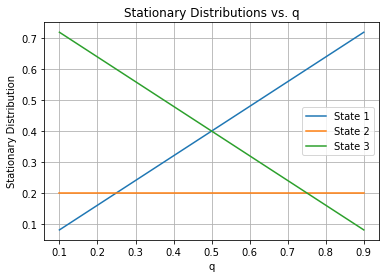

In [32]:
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Function to generate the transition matrix
def generate_transition_matrix(p, q, r):
    return np.array([
        [p,1-p, 0],
        [q, 0, 1-q],
        [0, r, 1-r]
    ])

# Function to calculate the stationary distribution
def stationary_distribution(P):
    eigvals, eigvecs = np.linalg.eig(P.T)
    stationary = eigvecs[:, np.isclose(eigvals, 1)]
    stationary = stationary / stationary.sum()
    return stationary.real.flatten()

p = 0.75
r = 0.25

qs = np.arange(0.1, 1.0, 0.1)

#  Calculate the stationary distribution for each value of q
stationary_distributions = []
for q in qs:
    P = generate_transition_matrix(p, q, r)
    print(f"Transition matrix for q={q}:")
    print(P)
    stationary_distributions.append(stationary_distribution(P))

stationary_distributions = np.array(stationary_distributions)
print("stationary_distributions: ")
print(stationary_distributions)

# Plot the stationary distributions
plt.plot(qs, stationary_distributions[:, 0], label='State 1')
plt.plot(qs, stationary_distributions[:, 1], label='State 2')
plt.plot(qs, stationary_distributions[:, 2], label='State 3')
plt.xlabel('q')
plt.ylabel('Stationary Distribution')
plt.title('Stationary Distributions vs. q')
plt.legend()
plt.grid(True)
plt.show()


# QUESTION THREE

In [4]:
# State space
states = ['North', 'South', 'West']
print(states)


['North', 'South', 'West']


In [10]:
# Transition matrix
import numpy as np
transition_matrix = np.array([
    [0.30, 0.30, 0.40],  # North to [North, South, West]
    [0.40, 0.40, 0.20],  # South to [North, South, West]
    [0.50, 0.30, 0.20]   # West to [North, South, West]
])
print(transition_matrix)


[[0.3 0.3 0.4]
 [0.4 0.4 0.2]
 [0.5 0.3 0.2]]


In [28]:
# MarkovChain class
class MarkovChain:
    def __init__(self, states, transition_matrix):
        self.states = states
        self.transition_matrix = transition_matrix

    def step(self, current_state, steps):
        state_vector = np.zeros(len(self.states))
        state_vector[self.states.index(current_state)] = 1
        final_state_vector = np.linalg.matrix_power(self.transition_matrix, steps).dot(state_vector)
        return final_state_vector
mc = MarkovChain(states, transition_matrix)
print(mc)

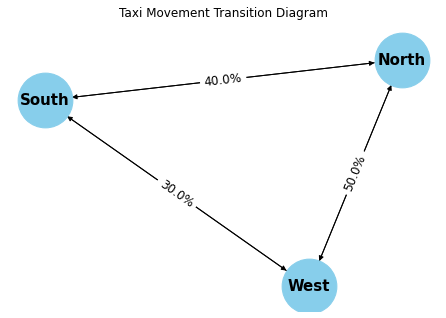

In [13]:
# Draw transition diagram
import networkx as nx
import matplotlib.pyplot as plt

G = nx.DiGraph()

for i, state in enumerate(states):
    for j, transition_prob in enumerate(transition_matrix[i]):
        G.add_edge(states[i], states[j], weight=transition_prob)

pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_size=3000, node_color="skyblue", font_size=15, font_weight="bold", arrows=True)
edge_labels = {(u, v): f"{d['weight']*100:.1f}%" for u, v, d in G.edges(data=True)}
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=12)
plt.title("Taxi Movement Transition Diagram")
plt.show()


In [14]:
# Probability after two trips
prob_north_after_2_trips = mc.step('North', 2)[0]
print(f"Probability of being in North after 2 trips: {prob_north_after_2_trips}")

# Probability after three trips
prob_north_after_3_trips = mc.step('North', 3)[0]
print(f"Probability of being in North after 3 trips: {prob_north_after_3_trips}")


Probability of being in North after 2 trips: 0.41000000000000003
Probability of being in North after 3 trips: 0.385


In [15]:
# Stationary distribution
def stationary_distribution(P):
    eigvals, eigvecs = np.linalg.eig(P.T)
    stationary = eigvecs[:, np.isclose(eigvals, 1)]
    stationary = stationary / stationary.sum()
    return stationary.real.flatten()

stationary = stationary_distribution(transition_matrix)
print(f"Stationary distribution: {stationary}")


Stationary distribution: [0.38888889 0.33333333 0.27777778]
